## Solar Footprints Feasibility Analysis in California

#### Business Context:
As the transition to renewable energy is growing, selecting optimal, cost-effective sites for solar installations is critical for developers, utility companies, and policymakers. The "Solar Footprints in California" dataset provides key insights into site feasibility by offering information on land classification, proximity to infrastructure, and available acreage. This helps stakeholders make faster, more informed choices, avoiding costly, suboptimal locations. By combining Spark-based data processing with advanced predictive models and visualizations, we aim to improve the selection process for solar sites, aligning with California's renewable energy goals and broader environmental priorities.

Dataset Overview
The dataset provides essential information for solar installation feasibility analysis, incorporating both geographic characteristics and technical aspects such as proximity to nearby infrastructure (i.e. substations). These features influence the success, efficiency, and cost of solar power projects.

Dataset Link:
https://catalog.data.gov/dataset/solar-footprints-in-california-6251a

Key Columns:
OBJECTID:
A unique identifier for each record in the dataset. This column is mainly for reference and does not contribute directly to the feasibility prediction.

County:
The name of the county where the solar installation site is located. This is important for geographic and policy-related analysis.

Acres:
The available land area (in acres) for solar installation. Larger areas generally allow for more solar panels and higher energy output, influencing feasibility.

Install Type:
The type of solar installation, such as rooftop, ground mount, or floating. The installation type affects the solar capacity, maintenance costs, and overall energy production efficiency.

Urban or Rural:
Indicates whether the site is in an urban or rural area. This can affect accessibility, land costs, and infrastructure considerations.

Combined Class:
A classification combining different factors related to the land and its suitability for solar installation. This helps in categorizing land based on its potential for solar power generation.

Distance to Substation (Miles) GTET 100 Max Voltage:
The distance (in miles) from the site to the GTET 100 substation, which influences the cost-effectiveness of connecting the site to the energy grid.

Percentile (GTET 100 Max Voltage):
The percentile value representing the voltage efficiency at the GTET 100 substation. Higher values suggest better infrastructure for integrating solar power into the grid.

Substation Name GTET 100 Max Voltage:
The name of the GTET 100 substation, used for grid connectivity mapping and understanding its capacity to support solar energy.

HIFLD ID (GTET 100 Max Voltage):
A unique identifier for the GTET 100 substation, used for mapping and reference purposes.

Distance to Substation (Miles) GTET 200 Max Voltage:
The distance (in miles) from the site to the GTET 200 substation. Proximity to substations is crucial for the cost and feasibility of connecting the site to the grid.

Percentile (GTET 200 Max Voltage):
The percentile value representing voltage efficiency at the GTET 200 substation, indicating the quality of infrastructure available for solar integration.

Substation Name GTET 200 Max Voltage:
The name of the GTET 200 substation, used for identifying the proximity and capacity of nearby energy infrastructure.

HIFLD ID (GTET 200 Max Voltage):
A unique identifier for the GTET 200 substation, used for mapping and reference purposes.

Distance to Substation (Miles) CAISO:
The distance (in miles) from the site to the CAISO substation. This helps evaluate the ease of connecting the site to the grid.

Percentile (CAISO):
The percentile representing voltage efficiency at the CAISO substation, indicating its suitability for solar integration.

Substation CASIO Name:
The name of the CAISO substation. It is used to map the site’s proximity to the CAISO grid.

HIFLD ID (CAISO):
A unique identifier for the CAISO substation, helping to map and evaluate grid connectivity.

Solar Technoeconomic Intersection:
A categorical variable that classifies the site’s feasibility for solar installation based on factors such as land area, proximity to substations, and environmental considerations.

Shape__Area:
The geometric area (in acres) of the land, which directly impacts the number of solar panels that can be installed.

Shape__Length:
The geometric length (in meters) of the land, which helps in determining the layout and arrangement of solar panels.

This dataset is crucial for determining optimal solar installation sites, based on factors like land characteristics, distance to substations, and other technical attributes. The features provided will help identify high-potential sites for solar expansion, enabling data-driven decision-making for stakeholders in the solar energy industry.

In [1]:
# library

import pandas as pd

In [2]:
df = pd.read_csv('data/Solar_Footprints.csv')
df.head()

,OBJECTID,County,Acres,Install Type,Urban or Rural,Combined Class,Distance to Substation (Miles) GTET 100 Max Voltage,Percentile (GTET 100 Max Voltage),Substation Name GTET 100 Max Voltage,HIFLD ID (GTET 100 Max Voltage),...,Percentile (GTET 200 Max Voltage),Substation Name GTET 200 Max Voltage,HIFLD ID (GTET 200 Max Voltage),Distance to Substation (Miles) CAISO,Percentile (CAISO),Substation CASIO Name,HIFLD ID (CAISO),Solar Technoeconomic Intersection,Shape__Area,Shape__Length
0,1,Alameda County,1.672639,Rooftop,Urban,Rooftop - Urban,0.162732,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.272283,0 to 25th,Los Esteros,310258.0,Within,6768.954679,365.801336
1,2,Alameda County,1.897078,Rooftop,Urban,Rooftop - Urban,0.226728,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.392816,0 to 25th,Los Esteros,310258.0,Within,7677.228982,366.909878
2,3,Alameda County,1.275783,Rooftop,Urban,Rooftop - Urban,0.426104,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.537298,0 to 25th,Los Esteros,310258.0,Within,5162.935990,290.576263
3,4,Alameda County,1.424286,Rooftop,Urban,Rooftop - Urban,0.491306,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.626699,0 to 25th,Los Esteros,310258.0,Within,5763.905754,344.705846
4,5,Alameda County,0.984429,Rooftop,Urban,Rooftop - Urban,0.795822,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.728629,25th to 50th,Los Esteros,310258.0,Within,3983.859693,283.968425


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 21 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   OBJECTID                                             5397 non-null   int64  
 1   County                                               5397 non-null   object 
 2   Acres                                                5397 non-null   float64
 3   Install Type                                         5397 non-null   object 
 4   Urban or Rural                                       5397 non-null   object 
 5   Combined Class                                       5397 non-null   object 
 6   Distance to Substation (Miles) GTET 100 Max Voltage  5397 non-null   float64
 7   Percentile (GTET 100 Max Voltage)                    5397 non-null   object 
 8   Substation Name GTET 100 Max Voltage                 5397 non-null  

In [4]:
df.columns

Index(['OBJECTID', 'County', 'Acres', 'Install Type', 'Urban or Rural',
       'Combined Class', 'Distance to Substation (Miles) GTET 100 Max Voltage',
       'Percentile (GTET 100 Max Voltage)',
       'Substation Name GTET 100 Max Voltage',
       'HIFLD ID (GTET 100 Max Voltage)',
       'Distance to Substation (Miles) GTET 200 Max Voltage',
       'Percentile (GTET 200 Max Voltage)',
       'Substation Name GTET 200 Max Voltage',
       'HIFLD ID (GTET 200 Max Voltage)',
       'Distance to Substation (Miles) CAISO', 'Percentile (CAISO)',
       'Substation CASIO Name', 'HIFLD ID (CAISO)',
       'Solar Technoeconomic Intersection', 'Shape__Area', 'Shape__Length'],
      dtype='object')

In [5]:
df.describe()

,OBJECTID,Acres,Distance to Substation (Miles) GTET 100 Max Voltage,HIFLD ID (GTET 100 Max Voltage),Distance to Substation (Miles) GTET 200 Max Voltage,HIFLD ID (GTET 200 Max Voltage),Distance to Substation (Miles) CAISO,HIFLD ID (CAISO),Shape__Area,Shape__Length
count,5397.000000,5397.000000,5397.000000,5255.000000,5397.000000,5165.000000,5397.000000,5180.000000,5.397000e+03,5397.000000
mean,2699.000000,27.839660,4.875213,305367.672883,9.005963,305585.657696,6.488376,304801.542278,1.126635e+05,799.673056
std,1558.124032,185.731791,5.598614,3270.527238,8.956602,3102.131691,5.257426,3049.650963,7.516313e+05,1549.493451
min,1.000000,0.000413,0.000000,300007.000000,0.000000,300007.000000,0.000000,300004.000000,1.671917e+00,20.319768
25%,1350.000000,0.935973,1.364023,302331.000000,3.117734,303106.000000,2.655241,301858.000000,3.787762e+03,272.550078
50%,2699.000000,2.098715,2.766023,305578.000000,6.142767,305906.000000,5.061011,304448.000000,8.493241e+03,412.061886
75%,4048.000000,4.775675,6.182651,308662.000000,11.999466,308822.000000,8.782869,307282.000000,1.932655e+04,645.830476
max,5397.000000,7438.603255,55.746475,310981.000000,102.224911,310527.000000,60.378808,310731.000000,3.010313e+07,35928.275147


In [6]:
# --- DROP COLUMNS ---
named_cols = ['OBJECTID', 
       'Substation Name GTET 100 Max Voltage',
       'HIFLD ID (GTET 100 Max Voltage)',
       'Substation Name GTET 200 Max Voltage',
       'HIFLD ID (GTET 200 Max Voltage)',
       'Substation CASIO Name', 'HIFLD ID (CAISO)']

df = df.drop(columns=named_cols)
df.columns

Index(['County', 'Acres', 'Install Type', 'Urban or Rural', 'Combined Class',
       'Distance to Substation (Miles) GTET 100 Max Voltage',
       'Percentile (GTET 100 Max Voltage)',
       'Distance to Substation (Miles) GTET 200 Max Voltage',
       'Percentile (GTET 200 Max Voltage)',
       'Distance to Substation (Miles) CAISO', 'Percentile (CAISO)',
       'Solar Technoeconomic Intersection', 'Shape__Area', 'Shape__Length'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   County                                               5397 non-null   object 
 1   Acres                                                5397 non-null   float64
 2   Install Type                                         5397 non-null   object 
 3   Urban or Rural                                       5397 non-null   object 
 4   Combined Class                                       5397 non-null   object 
 5   Distance to Substation (Miles) GTET 100 Max Voltage  5397 non-null   float64
 6   Percentile (GTET 100 Max Voltage)                    5397 non-null   object 
 7   Distance to Substation (Miles) GTET 200 Max Voltage  5397 non-null   float64
 8   Percentile (GTET 200 Max Voltage)                    5397 non-null  

### Analysis

2.1 Solar Installations Within vs Outside Substation Ranges

This query counts the number of solar installations based on whether they fall within or outside the technoeconomic feasibility criteria for solar installation, using the Solar Technoeconomic Intersection field. This field shows whether a site is deemed feasible based on factors such as land area, proximity to infrastructure, and environmental considerations.

In [8]:
print(df['Solar Technoeconomic Intersection'].value_counts())
print(df['Solar Technoeconomic Intersection'].value_counts(normalize=True))

Solar Technoeconomic Intersection
Within     3790
Outside    1607
Name: count, dtype: int64
Solar Technoeconomic Intersection
Within     0.702242
Outside    0.297758
Name: proportion, dtype: float64


2.2 Distribution by Installation Type

This query shows the count, percentage, and average land area in acres of each solar installation type.

In [18]:
summary = df.groupby('Install Type').agg(
    count=('Install Type', 'count'),
    percent=('Install Type', lambda x: 100 * len(x) / len(df)),
    mean_acres=('Acres', 'mean')
)

print(summary)


              count    percent  mean_acres
Install Type                              
Ground         2164  40.096350   65.848089
Parking        1392  25.792107    1.808785
Rooftop        1841  34.111543    2.844950


2.3 Top 10 Counties by Solar Adoption


This query shows the top 10 counties with the highest total acres of solar installations, including the number of installations and average distance to the nearest substation.

In [10]:
df.groupby('County').agg(
        Total_Acres=('Acres', 'sum'),
        Avg_Distance=('Distance to Substation (Miles) GTET 100 Max Voltage', 'mean')
    ).sort_values(by='Total_Acres', ascending=False).head(10).round(2)

,Total_Acres,Avg_Distance
County,,
Kern County,31120.01,4.67
Riverside County,27407.23,4.09
Imperial County,16433.79,4.82
San Bernardino County,16015.42,3.94
Kings County,15900.62,7.82
Los Angeles County,11084.96,6.11
Fresno County,8462.82,3.39
San Luis Obispo County,4749.20,11.68
Tulare County,3302.90,13.90


2.4 Urban vs Rural Distribution

This query shows the count and percentage of solar installations located in urban versus rural areas using the Urban or Rural field.

In [11]:
df.groupby('Urban or Rural').agg(
        Total_Acres=('Acres', 'sum'),
        percent_solar_footprint=('Acres', lambda x: 100 * x.sum() / df['Acres'].sum())
    ).round(2)

,Total_Acres,percent_solar_footprint
Urban or Rural,,
Rural,131315.18,87.4
Urban,18935.47,12.6


2.5 Average Distance to Substation by County

This query calculates the average distance to substations (at different voltage levels: 100, 200 and CAISO) for each county based on solar installation locations.

In [13]:
df.groupby(['County']).agg(
    Total_Acres=('Acres', 'sum'),
    Avg_Distance_GTET100=('Distance to Substation (Miles) GTET 100 Max Voltage', 'mean'),
    Avg_Distance_GTET200=('Distance to Substation (Miles) GTET 200 Max Voltage', 'mean'),
    Avg_Distance_CAISO=('Distance to Substation (Miles) CAISO', 'mean')
).sort_values(by='Total_Acres', ascending=False).head(10).round(2)

,Total_Acres,Avg_Distance_GTET100,Avg_Distance_GTET200,Avg_Distance_CAISO
County,,,,
Kern County,31120.01,4.67,9.78,5.36
Riverside County,27407.23,4.09,10.71,9.38
Imperial County,16433.79,4.82,5.50,7.98
San Bernardino County,16015.42,3.94,10.72,5.74
Kings County,15900.62,7.82,13.16,4.63
Los Angeles County,11084.96,6.11,6.46,5.07
Fresno County,8462.82,3.39,8.74,5.25
San Luis Obispo County,4749.20,11.68,13.62,5.89
Tulare County,3302.90,13.90,31.28,7.36


2.6 Distribution by Combined Class

This query provides the count and average acres of solar installations grouped by their combined class.

In [16]:
df.groupby('Combined Class').agg(
    count_panels=('Combined Class', 'count'),
    percent_solar_footprint=('Acres', lambda x: 100 * x.sum() / df['Acres'].sum())
).round(2)

,count_panels,percent_solar_footprint
Combined Class,,
Ground - Rural,1570,87.11
Ground - Urban,594,7.73
Parking - Rural,65,0.10
Parking - Urban,1327,1.57
Rooftop - Rural,131,0.18
Rooftop - Urban,1710,3.30


2.7 Correlation Between Acres and Distance to Substation

This query calculates the correlation between the area of solar installations (Acres) and the distance to substations at different voltage levels (GTET 100, GTET 200, and CAISO).

In [18]:
cols = [
    'Acres',
    'Distance to Substation (Miles) GTET 100 Max Voltage',
    'Distance to Substation (Miles) GTET 200 Max Voltage',
    'Distance to Substation (Miles) CAISO'
]

corrs = df[cols].corr().round(4)
corrs['Acres'][1:]   # correlations of Acres with all distance columns


Distance to Substation (Miles) GTET 100 Max Voltage    0.0319
Distance to Substation (Miles) GTET 200 Max Voltage    0.0061
Distance to Substation (Miles) CAISO                  -0.0186
Name: Acres, dtype: float64

2.8 Distance Impact on Installation Size

This query analyzes the impact of the distance to substations on the average size of solar installations by grouping installations into distance bins (0-2 miles, 2-5 miles, and 5+ miles) and calculating the average size and count of installations for each bin.

In [19]:
bins = [0, 2, 5, float('inf')]
labels = ['0-2 miles', '2-5 miles', '5+ miles']

df['Distance_Bin'] = pd.cut(df['Distance to Substation (Miles) GTET 100 Max Voltage'],
                            bins=bins, labels=labels, right=False)

distance_impact = (
    df.groupby('Distance_Bin')['Acres']
      .agg(avg_size='mean', count='count')
      .round(2)
)

print(distance_impact)


              avg_size  count
Distance_Bin                 
0-2 miles        19.89   2002
2-5 miles        28.81   1716
5+ miles         36.32   1679


/var/folders/zq/l7ksgcmd2gz_dslkrw3n0b000000gn/T/ipykernel_45353/2150625605.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Distance_Bin')['Acres']


2.9 Counties with High Solar Potential but Far from Substations

This query identifies counties with high solar adoption potential that are far from substations. It helps to highlight regions where solar installations are abundant but may face infrastructure challenges due to long distances from the nearest substation. This analysis focuses on counties where the average distance to the substation is above the average for all counties, indicating that these areas might require additional investments in grid infrastructure for integration.

In [21]:
summary = df.groupby('County').agg(
    installation =('County', 'count'),
    avg_distance_GTET100 = ('Distance to Substation (Miles) GTET 100 Max Voltage', 'mean')).round(2)

summary[summary['avg_distance_GTET100'] > summary['avg_distance_GTET100'].mean()]

,installation,avg_distance_GTET100
County,,
Amador County,2,6.28
Colusa County,10,14.42
Glenn County,10,8.44
Humboldt County,3,9.15
Inyo County,15,17.02
Kings County,137,7.82
Lassen County,4,26.40
Los Angeles County,681,6.11
Monterey County,60,12.08


2.10 Heatmap of Feasible Sites by County and Distance Range

This heatmap helps identify high-potential areas for solar installations by visualizing the distribution of feasible sites in relation to distance from substations.

/var/folders/zq/l7ksgcmd2gz_dslkrw3n0b000000gn/T/ipykernel_45353/4107003067.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_feasible.groupby(['County', 'Distance_Bin'])


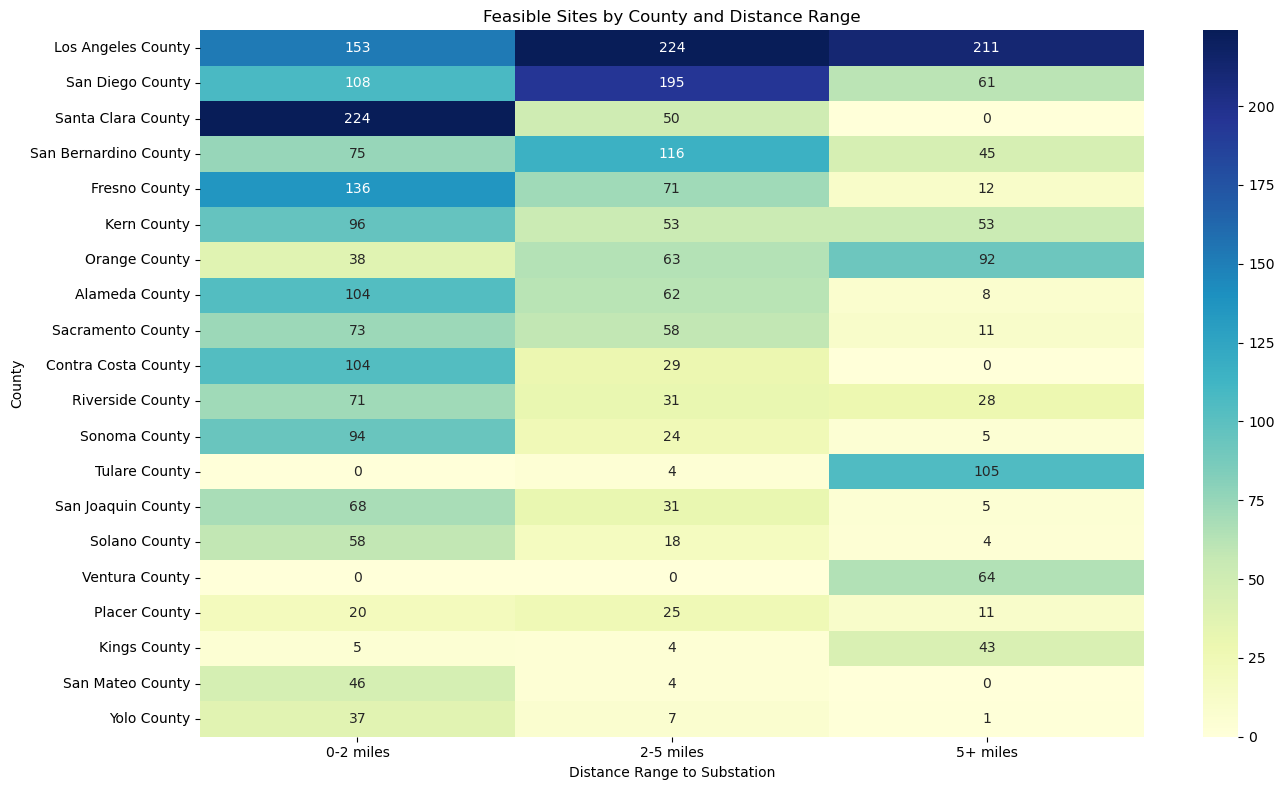

In [24]:
# heatmap visualization

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# # Create distance range bins
# df['Distance Range'] = pd.cut(
#     df['Distance to Substation (Miles) CAISO'],
#     bins=[0, 1, 3, 5, float('inf')],
#     labels=['0-1 miles', '1-3 miles', '3-5 miles', '>5 miles'],
#     right=True
# )

# Filter for feasible sites ("Within")
df_feasible = df[df['Solar Technoeconomic Intersection'] == 'Within']

# Group, pivot, and get top 20 counties
heatmap_data = (
    df_feasible.groupby(['County', 'Distance_Bin'])
    .size()
    .reset_index(name='count')
    .pivot(index='County', columns='Distance_Bin', values='count')
    .fillna(0)
)

# Select top 20 counties
top_counties = heatmap_data.sum(axis=1).nlargest(20).index
heatmap_data = heatmap_data.loc[top_counties]

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Feasible Sites by County and Distance Range")
plt.xlabel("Distance Range to Substation")
plt.ylabel("County")
plt.tight_layout()
plt.show()



#### 2.11 Correlation Matrix

This correlation matrix heatmap visualizes the relationships between various features in the dataset.

In [27]:
df.columns

Index(['County', 'Acres', 'Install Type', 'Urban or Rural', 'Combined Class',
       'Distance to Substation (Miles) GTET 100 Max Voltage',
       'Percentile (GTET 100 Max Voltage)',
       'Distance to Substation (Miles) GTET 200 Max Voltage',
       'Percentile (GTET 200 Max Voltage)',
       'Distance to Substation (Miles) CAISO', 'Percentile (CAISO)',
       'Solar Technoeconomic Intersection', 'Shape__Area', 'Shape__Length',
       'Distance_Bin', 'Distance Range'],
      dtype='object')

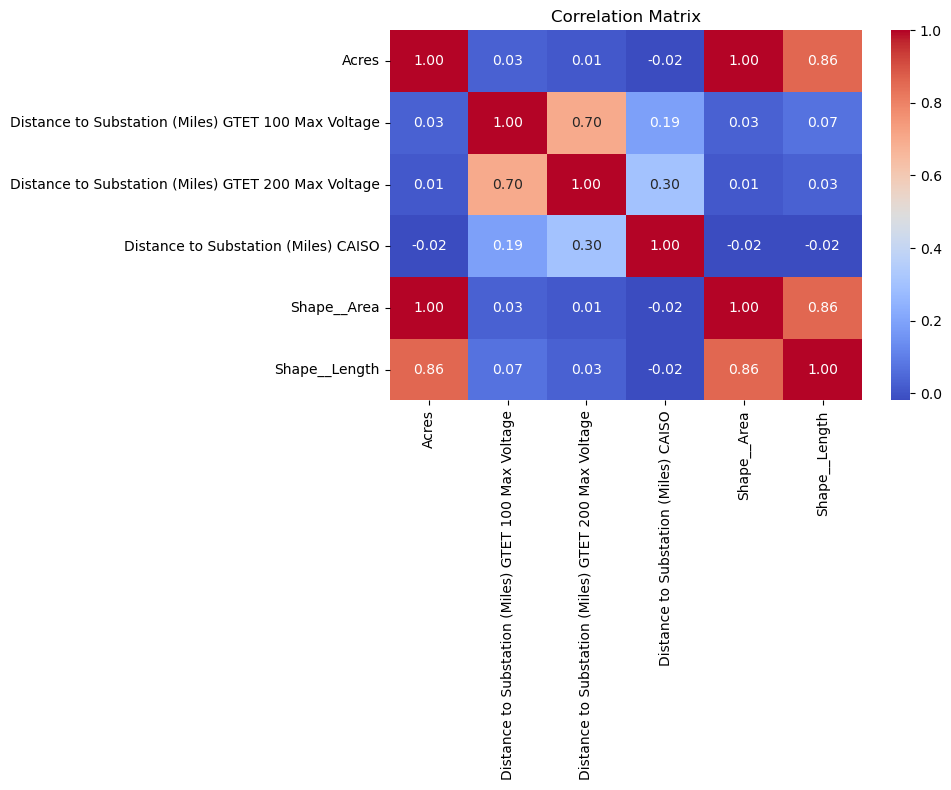

In [28]:
numeric_cols = [
    'Acres',
    'Distance to Substation (Miles) GTET 100 Max Voltage',
    'Distance to Substation (Miles) GTET 200 Max Voltage',
    'Distance to Substation (Miles) CAISO',
    'Shape__Area',
    'Shape__Length'
]
corr_df = df[numeric_cols].corr().round(2)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

### 3. Data Cleaning & Feature Engineering

Before building machine learning models, the dataset requires some data cleaning and feature engineering to ensure it is in the best possible shape for analysis. This section describes the steps taken to handle missing values, convert data types, and create new features that may help improve model performance.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 15 columns):
 #   Column                                               Non-Null Count  Dtype   
---  ------                                               --------------  -----   
 0   County                                               5397 non-null   object  
 1   Acres                                                5397 non-null   float64 
 2   Install Type                                         5397 non-null   object  
 3   Urban or Rural                                       5397 non-null   object  
 4   Combined Class                                       5397 non-null   object  
 5   Distance to Substation (Miles) GTET 100 Max Voltage  5397 non-null   float64 
 6   Percentile (GTET 100 Max Voltage)                    5397 non-null   object  
 7   Distance to Substation (Miles) GTET 200 Max Voltage  5397 non-null   float64 
 8   Percentile (GTET 200 Max Voltage)                    5397 

In [33]:
rows_count = df.shape[0]
print(f"Total number of rows: {rows_count}")

Total number of rows: 5397


In [36]:
northern = ["Del Norte","Humboldt","Lassen","Mendocino","Modoc","Shasta","Siskiyou","Tehama","Trinity"]
north_central = ["Alpine","Amador","Butte","Calaveras","Colusa","El Dorado","Glenn","Lake","Nevada","Placer","Plumas","Sacramento","San Joaquin","Sierra","Sutter","Yolo","Yuba"]
bay_delta = ["Alameda","Contra Costa","Marin","Napa","San Mateo","San Francisco","Santa Clara","Santa Cruz","Solano","Sonoma"]
central = ["Fresno","Kern","Kings","Madera","Mariposa","Merced","Monterey","San Benito","San Luis Obispo","Stanislaus","Tulare","Tuolumne"]
south_coast = ["Los Angeles","Orange","San Diego","Santa Barbara","Ventura"]
inland_deserts = ["Imperial","Inyo","Mono","Riverside","San Bernardino"]

def categorize_county(county):
    if county+" County" in northern:
        return 'Northern California'
    elif county in north_central:
        return 'North Central California'
    elif county in bay_delta:
        return 'Bay & Delta'
    elif county in central:
        return 'Central California'
    elif county in south_coast:
        return 'South Coast'
    elif county in inland_deserts:
        return 'Inland Deserts'
    else:
        return 'Other'

df['County_transform'] = df['County'].str.replace(' County', '', regex=False).str.strip()
df['Region'] = df['County_transform'].apply(categorize_county)
df['Region'].value_counts()

Region
Central California          1789
South Coast                 1372
Bay & Delta                  984
North Central California     618
Inland Deserts               571
Other                         63
Name: count, dtype: int64

#### Missing values

In [37]:
df.isna().sum()

County                                                 0
Acres                                                  0
Install Type                                           0
Urban or Rural                                         0
Combined Class                                         0
Distance to Substation (Miles) GTET 100 Max Voltage    0
Percentile (GTET 100 Max Voltage)                      0
Distance to Substation (Miles) GTET 200 Max Voltage    0
Percentile (GTET 200 Max Voltage)                      0
Distance to Substation (Miles) CAISO                   0
Percentile (CAISO)                                     0
Solar Technoeconomic Intersection                      0
Shape__Area                                            0
Shape__Length                                          0
Distance_Bin                                           0
Region                                                 0
County_transform                                       0
dtype: int64

### Pipeline: Transformations